In [3]:
import lwreg
from lwreg import standardization_lib
from lwreg import utils
config = lwreg.utils.defaultConfig()
# set the name of the database we'll work with:
config['dbtype'] = 'postgresql'
config['dbname'] = 'cs_mdfps'
config['host'] = 'scotland'
config['user'] = 'cschiebroek'
config['password'] = '' # password is saved in our .pgpass
# we don't want to standardize the molecules:
config['standardization'] = standardization_lib.RemoveHs()
# we want to store conformers
config['registerConformers'] = True

In [5]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolTransforms
def CanonicalizeOrientation(mol):
    for conf in mol.GetConformers():
        if conf.Is3D():
            rdMolTransforms.CanonicalizeConformer(conf)
    return mol

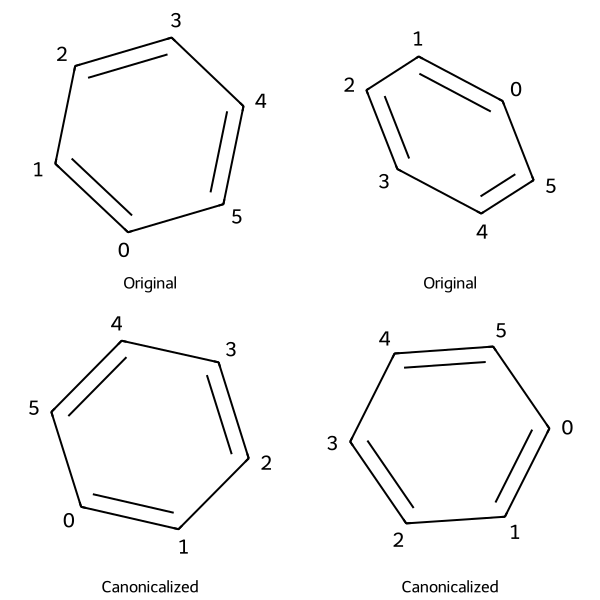

In [105]:
results = lwreg.retrieve(config=config, ids = lwreg.query(config=config,ids = lwreg.query(config=config, mol=Chem.MolFromSmiles('c1ccccc1'))))
mols = [Chem.MolFromMolBlock(r[2]) for r in results]
mol1 = Chem.Mol(mols[0])
mol2 = Chem.Mol(mols[1])
mol1 = CanonicalizeOrientation(mol1)
mol2 = CanonicalizeOrientation(mol2)
mols_all = mols + [mol1,mol2]
Draw.MolsToGridImage(mols_all, molsPerRow=2, subImgSize=(300,300), legends=['Original','Original','Canonicalized','Canonicalized'])

In [106]:
#try to register
lwreg.register(config=config, mol=mol1)

(1, 15658)

In [107]:
#try to register
lwreg.register(config=config, mol=mol2)

(1, 15659)

In [111]:
from rdkit.Chem import rdDistGeom
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

etkdg = rdDistGeom.ETKDGv3()
etkdg.randomSeed = 0xa700f
etkdg.verbose = False
etkdg.numThreads = 4
etkdg.trackFailures = True
etkdg.useRandomCoords = True
etkdg.pruneRmsThresh = 0.1

mol1 = Chem.AddHs(Chem.MolFromSmiles('c1ccccc1'))
mol2 = Chem.AddHs(Chem.MolFromSmiles('c1ccccc1'))

rdDistGeom.EmbedMolecule(mol1, etkdg)
rdDistGeom.EmbedMolecule(mol2, etkdg)

0

In [112]:
#what if we add the exact same one?
lwreg.register(config=config, mol=mol1)

(1, 15662)

In [113]:
lwreg.register(config=config, mol=mol2)

UniqueViolation: duplicate key value violates unique constraint "conformers_conformer_hash_key"
DETAIL:  Key (conformer_hash)=(-0.706,2.091,0.085;-1.001,0.534,1.86;-1.429,1.626,1.15;0.161,-0.082,1.485;0.456,1.476,-0.291;0.885,0.38,0.421) already exists.


False
False


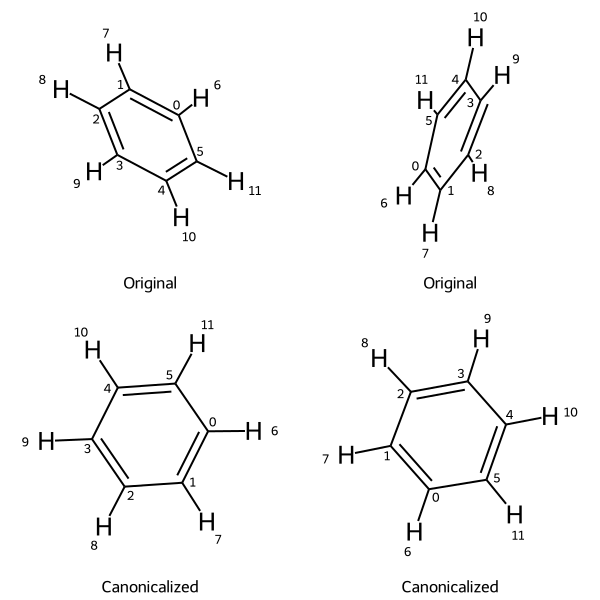

In [108]:
#reproduce this in code snippet
from rdkit.Chem import rdDistGeom
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

etkdg = rdDistGeom.ETKDGv3()
etkdg.randomSeed = 0xa700f
etkdg.verbose = False
etkdg.numThreads = 4
etkdg.trackFailures = True
etkdg.useRandomCoords = True
etkdg.pruneRmsThresh = 0.1

mol1 = Chem.AddHs(Chem.MolFromSmiles('c1ccccc1'))
mol2 = Chem.AddHs(Chem.MolFromSmiles('c1ccccc1'))

rdDistGeom.EmbedMolecule(mol1, etkdg)

etkdg.randomSeed = 0xc0ff33

rdDistGeom.EmbedMolecule(mol2, etkdg)

mol1_can = Chem.Mol(mol1)
mol2_can = Chem.Mol(mol2)

#canonicalize
rdMolTransforms.CanonicalizeConformer(mol1_can.GetConformer())
rdMolTransforms.CanonicalizeConformer(mol2_can.GetConformer())

#compare coords of mol1 and mol1_can
print(mol1_can.GetConformer().GetAtomPosition(0).x == mol2_can.GetConformer().GetAtomPosition(0).x)
print(mol1_can.GetConformer().GetAtomPosition(0).x == mol2_can.GetConformer().GetAtomPosition(4).x)

#draw
draw_mols = [mol1,mol2,mol1_can,mol2_can]
Draw.MolsToGridImage(draw_mols, molsPerRow=2, subImgSize=(300,300), legends=['Original','Original','Canonicalized','Canonicalized'])

In [81]:
x,y,z, = rdMolTransforms.ComputeCentroid(mol1.GetConformer())
print(x,y,z)
x,y,z, = rdMolTransforms.ComputeCentroid(mol2.GetConformer())
print(x,y,z)

0.0 1.850371707708594e-17 -2.082571672982573e-18
9.251858538542972e-17 -7.401486830834377e-17 0.0


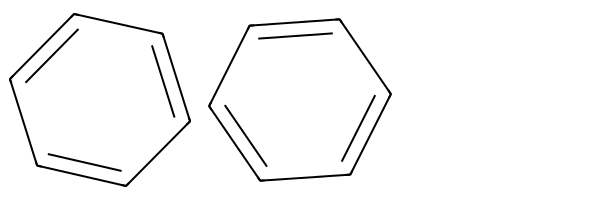

In [75]:
mol1 = Chem.Mol(mols[0])
mol2 = Chem.Mol(mols[1])
mol1 = CanonicalizeOrientation(mol1)
mol2 = CanonicalizeOrientation(mol2)
Draw.MolsToGridImage([mol1,mol2])




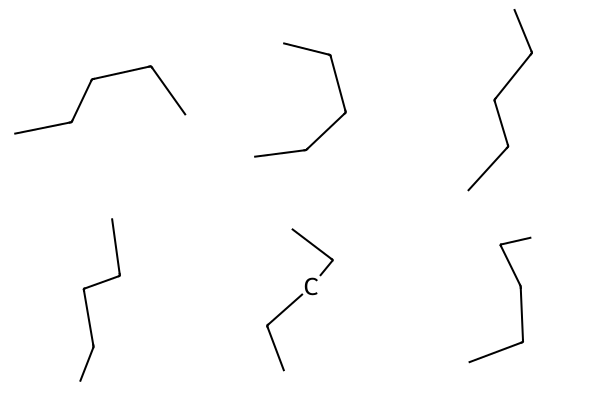

In [38]:
results = lwreg.retrieve(config=config, ids = lwreg.query(config=config,ids = lwreg.query(config=config, mol=Chem.MolFromSmiles('CCCCC'))))
mols = [Chem.MolFromMolBlock(r[2]) for r in results]
from rdkit.Chem import Draw
Draw.MolsToGridImage(mols)

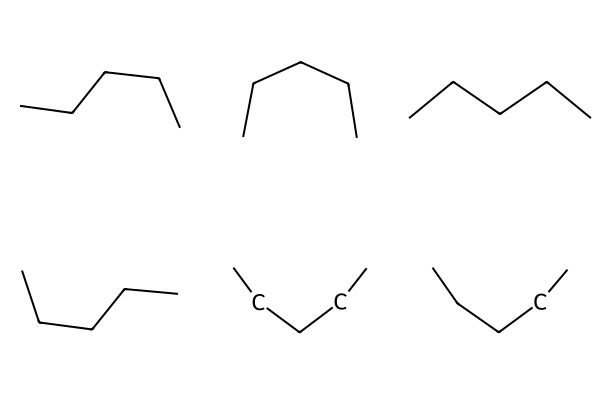

In [39]:
mol_copies = []
for mol in mols:
    mol_copy = Chem.Mol(mol)
    mol_copy = CanonicalizeOrientation(mol_copy)
    mol_copies.append(mol_copy)
Draw.MolsToGridImage(mol_copies)

In [35]:
results

((1,
  2298,
  '[H]c1c([H])c([H])c([H])c([H])c1[H]\n     RDKit          3D\n\n  0  0  0  0  0  0  0  0  0  0999 V3000\nM  V30 BEGIN CTAB\nM  V30 COUNTS 6 6 0 0 0\nM  V30 BEGIN ATOM\nM  V30 1 C -0.299494 -1.350989 0.014102 0\nM  V30 2 C -1.305512 -0.403185 0.042751 0\nM  V30 3 C -1.030725 0.949724 0.029426 0\nM  V30 4 C 0.303716 1.342560 -0.014205 0\nM  V30 5 C 1.298465 0.393427 -0.042492 0\nM  V30 6 C 1.020641 -0.962959 -0.029061 0\nM  V30 END ATOM\nM  V30 BEGIN BOND\nM  V30 1 2 1 2\nM  V30 2 1 2 3\nM  V30 3 2 3 4\nM  V30 4 1 4 5\nM  V30 5 2 5 6\nM  V30 6 1 6 1\nM  V30 END BOND\nM  V30 END CTAB\nM  END\n'),
 (1,
  7191,
  '\n     RDKit          3D\n\n  0  0  0  0  0  0  0  0  0  0999 V3000\nM  V30 BEGIN CTAB\nM  V30 COUNTS 6 6 0 0 0\nM  V30 BEGIN ATOM\nM  V30 1 C 0.456300 1.475500 -0.291000 0\nM  V30 2 C -0.705800 2.091400 0.084600 0\nM  V30 3 C -1.428600 1.625700 1.150100 0\nM  V30 4 C -1.000500 0.534000 1.859500 0\nM  V30 5 C 0.160600 -0.081900 1.484800 0\nM  V30 6 C 0.885100 0.38010

In [34]:
from rdkit.Chem import AllChem
print(f'RMSD: {AllChem.AlignMol(mols[0],mols[1])}')
print(f'Best RMSD: {AllChem.GetBestRMS(mols[0],mols[1])}')


RMSD: 0.023818778824246257
Best RMSD: 0.016077243490488613


In [31]:
results

((1,
  2298,
  '[H]c1c([H])c([H])c([H])c([H])c1[H]\n     RDKit          3D\n\n  0  0  0  0  0  0  0  0  0  0999 V3000\nM  V30 BEGIN CTAB\nM  V30 COUNTS 6 6 0 0 0\nM  V30 BEGIN ATOM\nM  V30 1 C -0.299494 -1.350989 0.014102 0\nM  V30 2 C -1.305512 -0.403185 0.042751 0\nM  V30 3 C -1.030725 0.949724 0.029426 0\nM  V30 4 C 0.303716 1.342560 -0.014205 0\nM  V30 5 C 1.298465 0.393427 -0.042492 0\nM  V30 6 C 1.020641 -0.962959 -0.029061 0\nM  V30 END ATOM\nM  V30 BEGIN BOND\nM  V30 1 2 1 2\nM  V30 2 1 2 3\nM  V30 3 2 3 4\nM  V30 4 1 4 5\nM  V30 5 2 5 6\nM  V30 6 1 6 1\nM  V30 END BOND\nM  V30 END CTAB\nM  END\n'),
 (1,
  7191,
  '\n     RDKit          3D\n\n  0  0  0  0  0  0  0  0  0  0999 V3000\nM  V30 BEGIN CTAB\nM  V30 COUNTS 6 6 0 0 0\nM  V30 BEGIN ATOM\nM  V30 1 C 0.456300 1.475500 -0.291000 0\nM  V30 2 C -0.705800 2.091400 0.084600 0\nM  V30 3 C -1.428600 1.625700 1.150100 0\nM  V30 4 C -1.000500 0.534000 1.859500 0\nM  V30 5 C 0.160600 -0.081900 1.484800 0\nM  V30 6 C 0.885100 0.38010

In [17]:
lwreg.retrieve(config=config, ids=74)

TypeError: 'int' object is not iterable

False
False


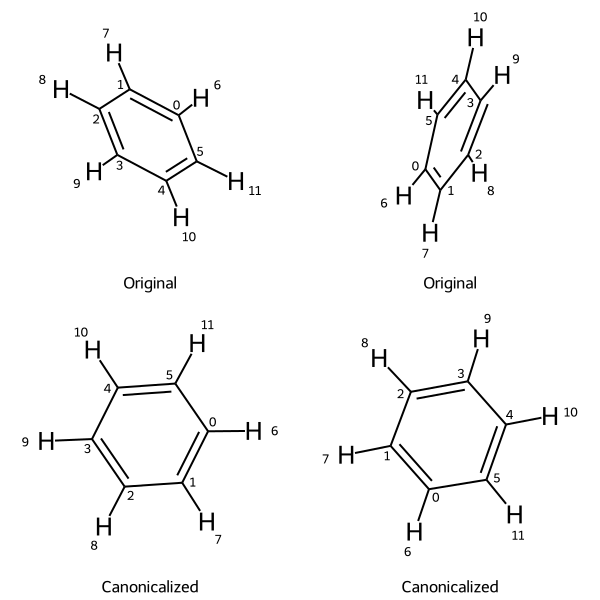

In [1]:
from rdkit.Chem import rdDistGeom
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolTransforms

IPythonConsole.drawOptions.addAtomIndices = True
etkdg = rdDistGeom.ETKDGv3()
etkdg.randomSeed = 0xa700f
etkdg.verbose = False
etkdg.numThreads = 4
etkdg.trackFailures = True
etkdg.useRandomCoords = True
etkdg.pruneRmsThresh = 0.1
mol1 = Chem.AddHs(Chem.MolFromSmiles('c1ccccc1'))
mol2 = Chem.AddHs(Chem.MolFromSmiles('c1ccccc1'))
rdDistGeom.EmbedMolecule(mol1, etkdg)
etkdg.randomSeed = 0xc0ff33
rdDistGeom.EmbedMolecule(mol2, etkdg)
mol1_can = Chem.Mol(mol1)
mol2_can = Chem.Mol(mol2)
#canonicalize
rdMolTransforms.CanonicalizeConformer(mol1_can.GetConformer())
rdMolTransforms.CanonicalizeConformer(mol2_can.GetConformer())
#compare coords of mol1 and mol1_can
print(mol1_can.GetConformer().GetAtomPosition(0).x == mol2_can.GetConformer().GetAtomPosition(0).x)
print(mol1_can.GetConformer().GetAtomPosition(0).x == mol2_can.GetConformer().GetAtomPosition(4).x)
#draw
draw_mols = [mol1,mol2,mol1_can,mol2_can]
Draw.MolsToGridImage(draw_mols, molsPerRow=2, subImgSize=(300,300), legends=['Original','Original','Canonicalized','Canonicalized'])

In [2]:
#get best rms
from rdkit.Chem import AllChem
print(f'RMSD: {AllChem.AlignMol(mol1,mol2)}')
print(f'Best RMSD: {AllChem.GetBestRMS(mol1,mol2)}')


RMSD: 0.03597997084628261
Best RMSD: 0.022307975461672968
